In [65]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')

fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='MaruBuri')

import warnings
warnings.filterwarnings('ignore')


import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin':
    plt.style.use('seaborn-darkgrid')
    rc('font', family = 'AppleGothic')

elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd '/content/drive/MyDrive/20240216/누아보해커톤데이터'

/content/drive/MyDrive/20240216/누아보해커톤데이터


*  84406개의 데이터
*  ID : 샘플 별 고유 id
*  월 : 사건 발생월
*  요일 : 월요일 ~ 일요일
*  시간 : 사건 발생 시각
*  소관경찰서 : 사건 발생 구역의 담당 경찰서
*  소관지역 : 사건 발생 구역
*  사건발생거리 : 가장 가까운 경찰서에서 사건
*  강수량(mm)
*  강설량(mm)
*  적설량(cm)
*   풍향 : 범죄발생지에서 바람이 부는 방향(최대 360도)
*   안개 : 가시거리가 1km 미만인 경우
*   짙은안개 : 가시거리가 200m 미만인 경우
*   번개
*   진눈깨비
*   서리
*   연기/연무 : 먼지, 연기가 하늘을 가리는 현상
*   눈날림
*   범죄발생지 : 범죄가 발생한 장소
*   TARGET : 범죄타입 [0 : 강도, 1: 절도, 2: 상해]








In [5]:
train = pd.read_csv('train.csv')
train.head(3)

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.0,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84406 entries, 0 to 84405
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       84406 non-null  object 
 1   월        84406 non-null  int64  
 2   요일       84406 non-null  object 
 3   시간       84406 non-null  int64  
 4   소관경찰서    84406 non-null  int64  
 5   소관지역     84406 non-null  float64
 6   사건발생거리   84406 non-null  float64
 7   강수량(mm)  84406 non-null  float64
 8   강설량(mm)  84406 non-null  float64
 9   적설량(cm)  84406 non-null  float64
 10  풍향       84406 non-null  float64
 11  안개       84406 non-null  float64
 12  짙은안개     84406 non-null  float64
 13  번개       84406 non-null  float64
 14  진눈깨비     84406 non-null  float64
 15  서리       84406 non-null  float64
 16  연기/연무    84406 non-null  float64
 17  눈날림      84406 non-null  float64
 18  범죄발생지    84406 non-null  object 
 19  TARGET   84406 non-null  int64  
dtypes: float64(13), int64(4), object(3)
memory usage: 

- train 데이터는 총 84406개 행(row)이 존재합니다.
결측치는 존재하지 않으며 요일, 범죄발생지 피처의 데이터타입이 object임을 알 수 있습니다.

In [7]:
# 기술통계량을 확인하기위해 describe() 함수를 사용
train.describe()

,월,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,TARGET
count,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000
mean,6.430195,6.769507,1060.027581,26.881726,1.912424,24.608776,2.284407,23.430503,186.926107,0.385423,0.017842,0.144042,0.020330,0.010260,0.210755,0.008921,0.835355
std,3.108302,3.566390,698.380485,13.870968,0.958556,62.711211,15.852881,85.199896,98.299485,0.486698,0.132379,0.351134,0.141128,0.100771,0.407847,0.094030,0.819762
min,1.000000,1.000000,26.000000,5.000000,0.012269,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,526.000000,13.000000,1.209985,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,7.000000,937.000000,27.000000,1.822279,0.625000,0.000000,0.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.000000,10.000000,1638.000000,38.000000,2.476528,18.571429,0.000000,0.000000,260.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,12.000000,12.000000,2450.000000,54.000000,4.998936,614.875000,295.000000,649.800000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


- 요일과 범죄발생지 통계가 출력되지 않았습니다.
해당 피처의 데이터는 문자열로 구성되어 있기 때문에 출력이 되지 않았습니다.
기술통계량은 확인할 수 없지만, value_counts() 함수를 사용함으로써 각 값의 등장빈도를 확인할 수 있습니다.

In [8]:
#결측치 개수 파악
train.isnull().sum().to_frame('nan_count')

,nan_count
ID,0
월,0
요일,0
시간,0
소관경찰서,0
소관지역,0
사건발생거리,0
강수량(mm),0
강설량(mm),0
적설량(cm),0


해당 데이터의 결측치는 존재하지 않았습니다.

In [9]:
train['범죄발생지'].value_counts()

주거지      36077
차도       25879
인도        6437
편의점       4835
주차장       3262
식당        1806
백화점       1493
주유소       1324
공원         736
학교         728
약국         653
호텔/모텔      591
병원         453
은행         132
Name: 범죄발생지, dtype: int64

# 이상치 확인

- 데이터 내부에는 평균적인 관측치와 멀리 떨어진 이상치가 존재하는 경우도 있습니다.
- boxplot을 사용하여 이상치를 확인할 수 있는데,
- 일부 피처의 이상치를 확인해보겠습니다.

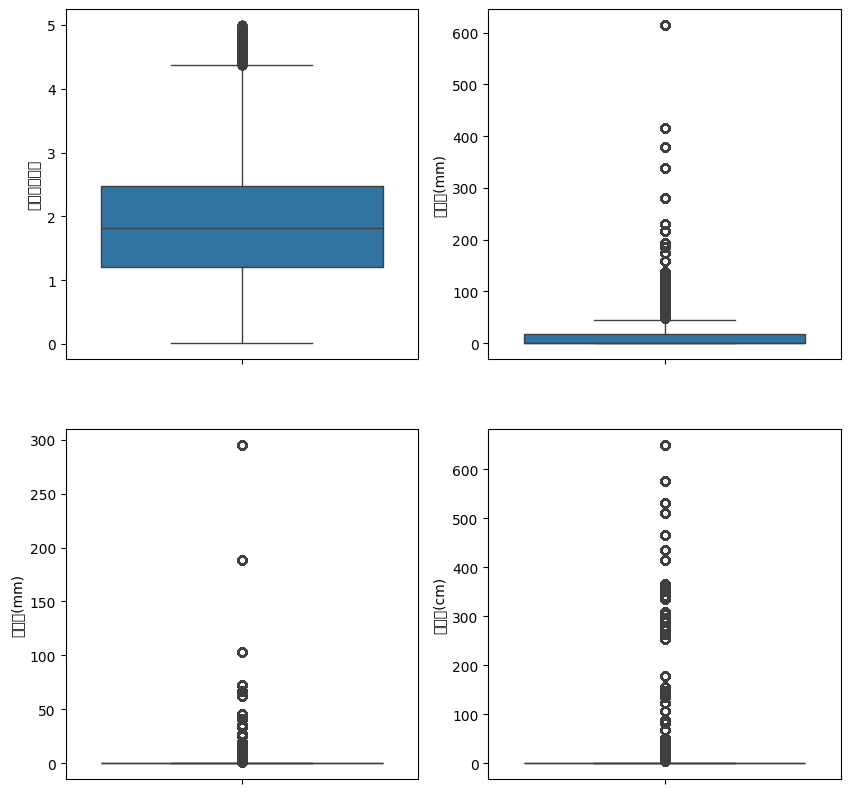

In [10]:
fig, axes = plt.subplots(2,2, figsize = (10,10))

sns.boxplot(y = train['사건발생거리'], ax = axes[0][0])
sns.boxplot(y = train['강수량(mm)'], ax = axes[0][1])

sns.boxplot(y = train['강설량(mm)'], ax = axes[1][0])
sns.boxplot(y = train['적설량(cm)'], ax = axes[1][1])

plt.show()

![image.png](attachment:image.png)

#월

In [11]:
train['월'].value_counts()

10    8827
9     8641
7     8559
8     8401
6     8271
5     7916
11    7682
3     6693
4     6672
1     6536
2     5192
12    1016
Name: 월, dtype: int64

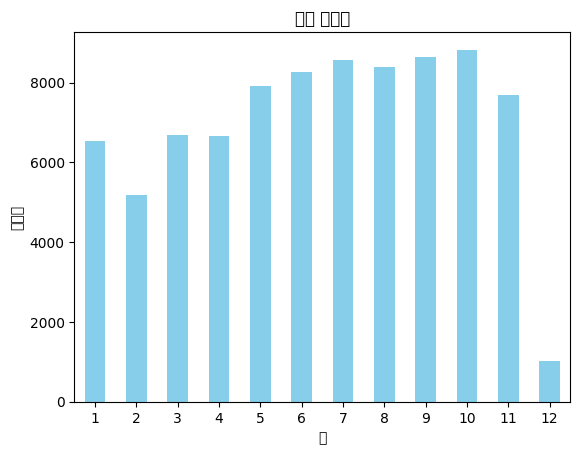

In [12]:
# '월' 열을 기준으로 빈도수 계산
monthly_counts = train['월'].value_counts().sort_index()

# 시각화

monthly_counts.plot(kind='bar', color='skyblue')
plt.title('월별 빈도수')
plt.xlabel('월')
plt.ylabel('빈도수')
plt.xticks(rotation=0)
plt.show()


* 12월에는 현저히 낮은 범죄 빈도를 보이며 6월부터 10월까지 높은 범죄 빈도를 보여준다.

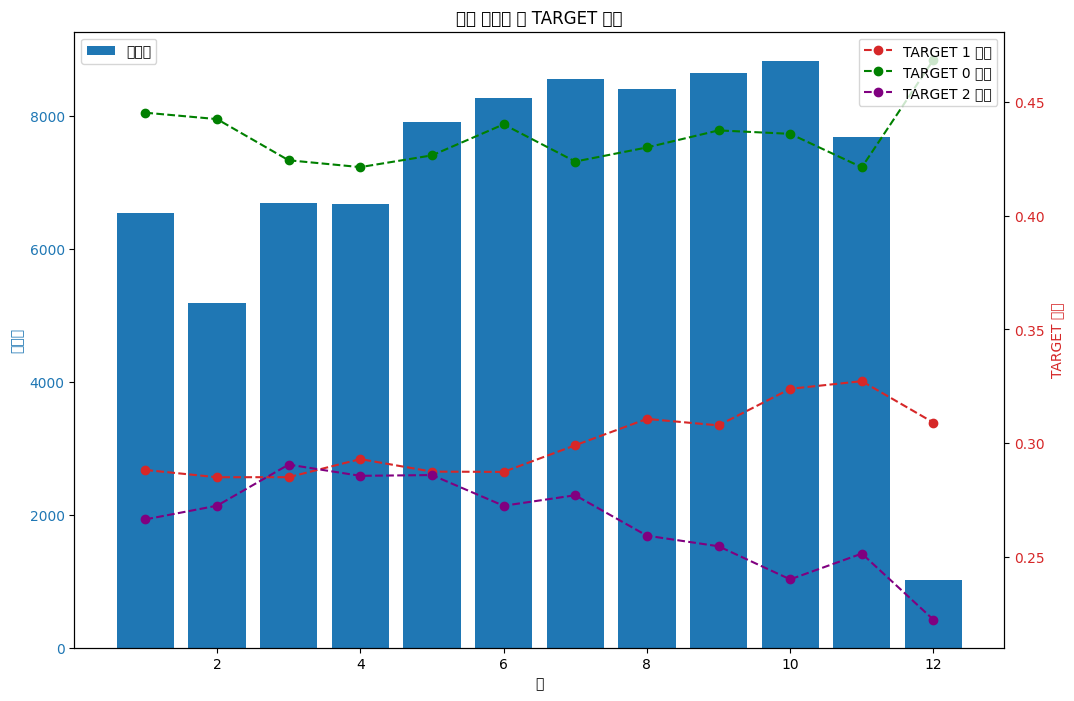

In [13]:
# '월' 열을 기준으로 빈도수 계산
monthly_counts = train['월'].value_counts().sort_index()

# '월' 별 'TARGET' 값의 비율 계산
target_counts_by_month = train.groupby('월')['TARGET'].value_counts(normalize=True).unstack(fill_value=0)

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 8))

# 빈도수를 막대 그래프로 표시
color = 'tab:blue'
ax1.set_xlabel('월')
ax1.set_ylabel('빈도수', color=color)
ax1.bar(monthly_counts.index, monthly_counts.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 'TARGET' 값의 비율을 선 그래프로 표시
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('TARGET 비율', color=color)
ax2.plot(target_counts_by_month.index, target_counts_by_month[1], label='TARGET 1 비율', color=color, linestyle='dashed', marker='o')
ax2.plot(target_counts_by_month.index, target_counts_by_month[0], label='TARGET 0 비율', color='green', linestyle='dashed', marker='o')
ax2.plot(target_counts_by_month.index, target_counts_by_month[2], label='TARGET 2 비율', color='purple', linestyle='dashed', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# 범례 위치를 조절하여 옆에 표시
ax1.legend(['빈도수'], loc='upper left')
ax2.legend(loc='upper right')

plt.title('월별 빈도수 및 TARGET 비율')
plt.show()


* 3월에는 TARGET2인 절도 범죄 행위의 비중이 제일 높은 달이다.

* 매월마다 TARGET0인 강도는 항상 많은 비중을 차지 한다.

* 3월을 제외한 모든 달은 강도>절도>상해 순으로 범죄 비율이 나타난다.

월            1         2         3         4         5         6         7   \
범죄발생지                                                                         
공원     0.023098  0.008152  0.038043  0.059783  0.088315  0.135870  0.216033   
백화점    0.067649  0.068319  0.083724  0.075017  0.086403  0.057602  0.079705   
병원     0.061810  0.077263  0.070640  0.097130  0.099338  0.092715  0.086093   
식당     0.050388  0.060354  0.051495  0.054264  0.079734  0.090808  0.105205   
약국     0.079632  0.070444  0.061256  0.084227  0.117917  0.113323  0.107198   
은행     0.083333  0.121212  0.030303  0.053030  0.015152  0.098485  0.098485   
인도     0.055305  0.038372  0.071462  0.068355  0.097095  0.108436  0.117291   
주거지    0.088173  0.069324  0.087369  0.085040  0.097015  0.098040  0.096571   
주유소    0.086103  0.050604  0.079305  0.082326  0.086103  0.098943  0.114048   
주차장    0.063458  0.054261  0.081239  0.080012  0.086757  0.088903  0.099632   
차도     0.074076  0.059430  0.077437  0.078674  0.094

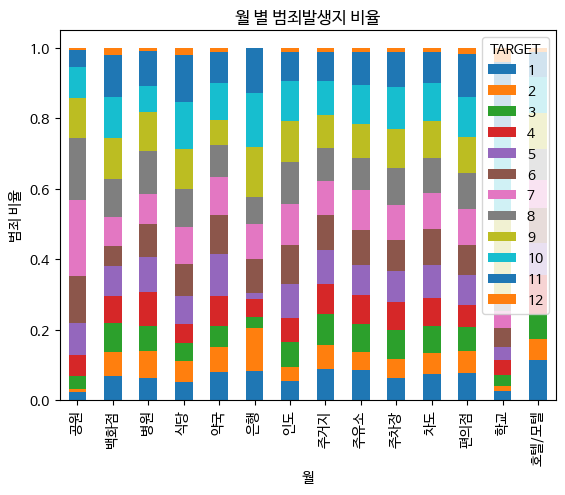

In [14]:
plt.rc('font', family='NanumBarunGothic')
target_counts_by_place = train.groupby('범죄발생지')['월'].value_counts(normalize=True).unstack(fill_value=0)
print(target_counts_by_place)
target_counts_by_place.plot(kind='bar', stacked=True)
plt.title('월 별 범죄발생지 비율')
plt.xlabel('월')
plt.ylabel('범죄 비율')

plt.legend(title='TARGET')
plt.show()

- 공원과 학교에서 나타나는 월별 범죄 발생량을 유사한양상을 띄고 있음.

#요일

In [15]:
train['요일'].value_counts()

토요일    13317
일요일    12837
금요일    12243
월요일    11702
화요일    11566
수요일    11410
목요일    11331
Name: 요일, dtype: int64

In [16]:
# 각 요일별 target 값의 비율 계산
weekday_target_ratio = train.groupby(['요일', 'TARGET']).size().unstack(fill_value=0)
weekday_target_ratio = weekday_target_ratio.div(weekday_target_ratio.sum(axis=1), axis=0)

print(weekday_target_ratio)

TARGET         0         1         2
요일                                  
금요일     0.418607  0.318549  0.262844
목요일     0.418939  0.326538  0.254523
수요일     0.419457  0.326030  0.254514
월요일     0.434968  0.296616  0.268416
일요일     0.470048  0.245540  0.284412
토요일     0.440865  0.281820  0.277315
화요일     0.415010  0.319990  0.265001


타 요일에 비해 토요일,일요일의 TARGET 0과  TARGET 2의 비율이 높으며 TARGET 1의 비율이 낮다.

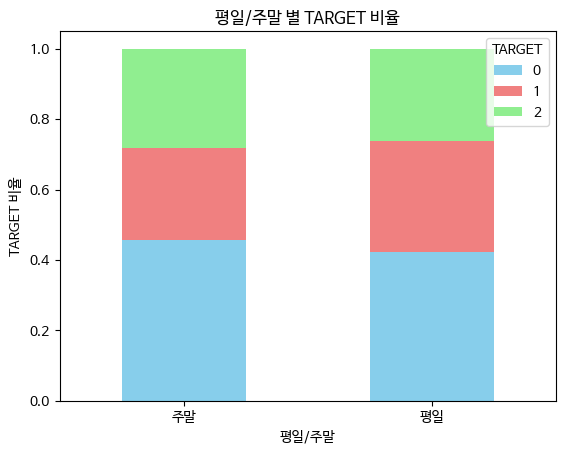

In [17]:
# '요일'을 월~금요일과 토요일~일요일로 묶기
train['요일_묶음'] = train['요일'].apply(lambda x: '평일' if x in ['월요일', '화요일', '수요일', '목요일', '금요일'] else '주말')

# '요일_묶음' 별 'TARGET' 값의 비율 계산
target_ratio_by_weekday = train.groupby('요일_묶음')['TARGET'].value_counts(normalize=True).unstack(fill_value=0)

# 시각화
target_ratio_by_weekday.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('평일/주말 별 TARGET 비율')
plt.xlabel('평일/주말')
plt.ylabel('TARGET 비율')
plt.xticks(rotation=0)
plt.legend(title='TARGET', loc='upper right')
plt.show()


* TARGET 0 (강도)은 주말(토~일)에서 더 많이 발생
* TARGET 1 (절도)는 평일에 더 많은 빈도로 발생
* TARGET 2 (상해)는 주말에 더 많은 빈도로 발생

# 시간

In [18]:
train['시간'].value_counts()

12    9440
10    7451
11    7423
9     7374
8     7130
1     7093
2     6800
3     6681
7     6452
4     6291
5     6152
6     6119
Name: 시간, dtype: int64

TARGET     0     1     2
시간                      
1       3174  2015  1904
2       3059  1985  1756
3       2911  2014  1756
4       2786  1926  1579
5       2631  1983  1538
6       2575  2026  1518
7       2698  2067  1687
8       3062  2162  1906
9       3115  2159  2100
10      3204  2107  2140
11      3376  1946  2101
12      3862  3007  2571
TARGET         0         1         2
시간                                  
1       0.447483  0.284083  0.268434
2       0.449853  0.291912  0.258235
3       0.435713  0.301452  0.262835
4       0.442855  0.306152  0.250993
5       0.427666  0.322334  0.250000
6       0.420820  0.331100  0.248080
7       0.418165  0.320366  0.261469
8       0.429453  0.303226  0.267321
9       0.422430  0.292785  0.284784
10      0.430009  0.282781  0.287210
11      0.454803  0.262158  0.283039
12      0.409110  0.318538  0.272352


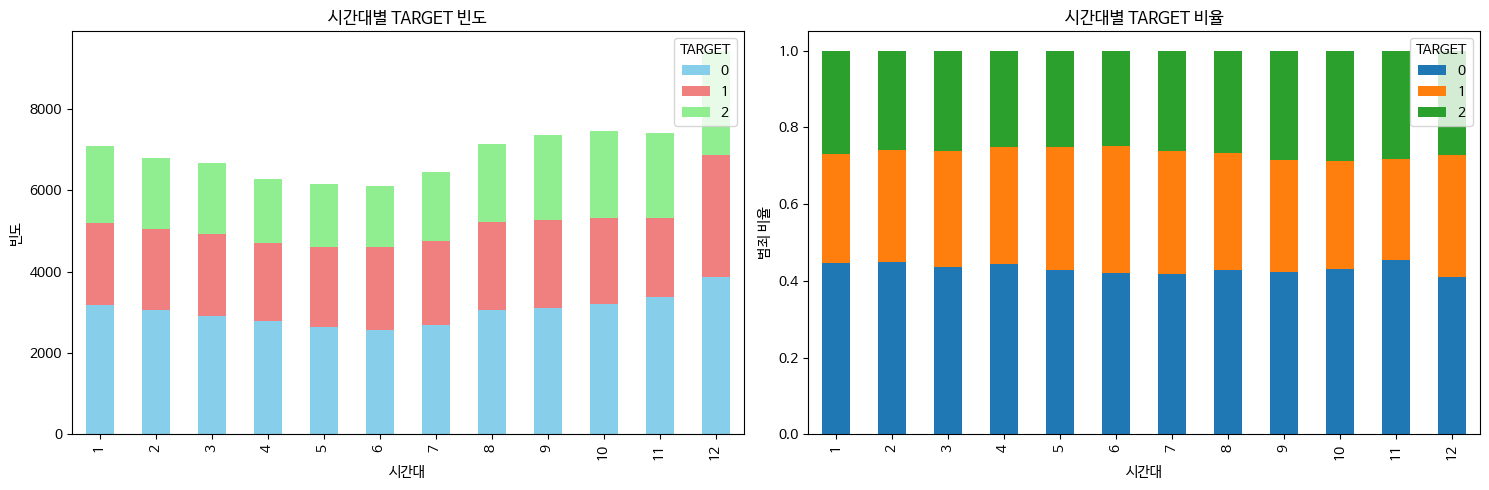

In [19]:
plt.rc('font', family='NanumBarunGothic')

# '시간' 별 'TARGET' 값의 빈도 계산
target_counts_by_time = train.groupby(['시간', 'TARGET']).size().unstack(fill_value=0)

# '시간' 별 'TARGET' 값의 비율 계산
target_ratio_by_time = train.groupby('시간')['TARGET'].value_counts(normalize=True).unstack(fill_value=0)

print(target_counts_by_time)
print(target_ratio_by_time)
# 1행 2열의 subplot 생성
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# 첫 번째 subplot: 빈도
target_counts_by_time.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral', 'lightgreen'], ax=axs[0])
axs[0].set_title('시간대별 TARGET 빈도')
axs[0].set_xlabel('시간대')
axs[0].set_ylabel('빈도')
axs[0].legend(title='TARGET', loc='upper right')

# 두 번째 subplot: 비율
target_ratio_by_time.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('시간대별 TARGET 비율')
axs[1].set_xlabel('시간대')
axs[1].set_ylabel('범죄 비율')
axs[1].legend(title='TARGET')

# 그래프 간 간격 조절
plt.tight_layout()

# 전체 그래프 표시
plt.show()


* 시간대 12에 가장 많은 범죄 빈도
* TARGET 0은 시간대 11에 많이 발생
* TARGET 1은 시간대 6에 많이 발생
* TARGET 2은 시간대 10에 많이 발생

범죄발생지        공원       백화점        병원        식당        약국        은행        인도  \
시간                                                                            
1      0.004793  0.018751  0.005921  0.021430  0.008177  0.001833  0.083181   
2      0.006176  0.017647  0.006765  0.025147  0.007353  0.002059  0.077794   
3      0.008831  0.020656  0.006286  0.027990  0.005538  0.003143  0.079030   
4      0.008902  0.028771  0.005564  0.027659  0.007789  0.002384  0.076299   
5      0.010728  0.021131  0.004064  0.026333  0.005689  0.001463  0.075748   
6      0.012420  0.020755  0.004576  0.020918  0.005066  0.000817  0.079752   
7      0.011469  0.017049  0.004805  0.020149  0.009144  0.000465  0.077030   
8      0.013043  0.015428  0.004067  0.020477  0.011641  0.001122  0.076578   
9      0.009628  0.014646  0.004475  0.019257  0.010442  0.000542  0.076756   
10     0.008187  0.011945  0.004966  0.016239  0.008724  0.001342  0.074889   
11     0.005254  0.014011  0.005658  0.016031  0.008

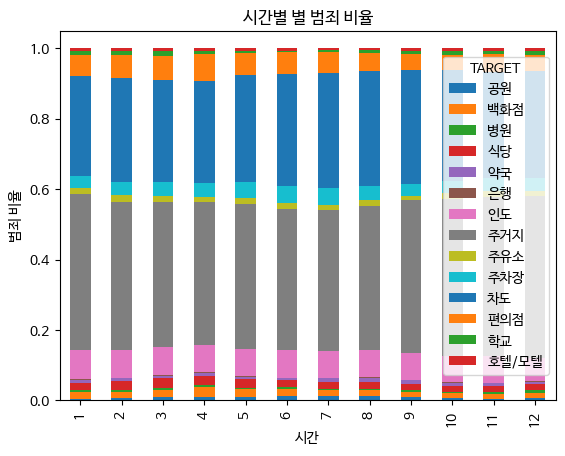

In [20]:
plt.rc('font', family='NanumBarunGothic')
target_counts_by_place = train.groupby('시간')['범죄발생지'].value_counts(normalize=True).unstack(fill_value=0)
print(target_counts_by_place)
target_counts_by_place.plot(kind='bar', stacked=True)
plt.title('시간별 별 범죄 비율')
plt.xlabel('시간')
plt.ylabel('범죄 비율')

plt.legend(title='TARGET')
plt.show()

* 시간대 별 공통적으로 주거지와 차도에서 많은 범죄발생 그 뒤로, 인도가 뒤를 이음
* 공원에서 사건발생시간은 주로 시간대 3에서부터 시간대 9까지 발생
* 편의점에서 시간대 2에서 시간대 4까지 보다 큰 범죄 빈도가 나타남

# 소관경찰서

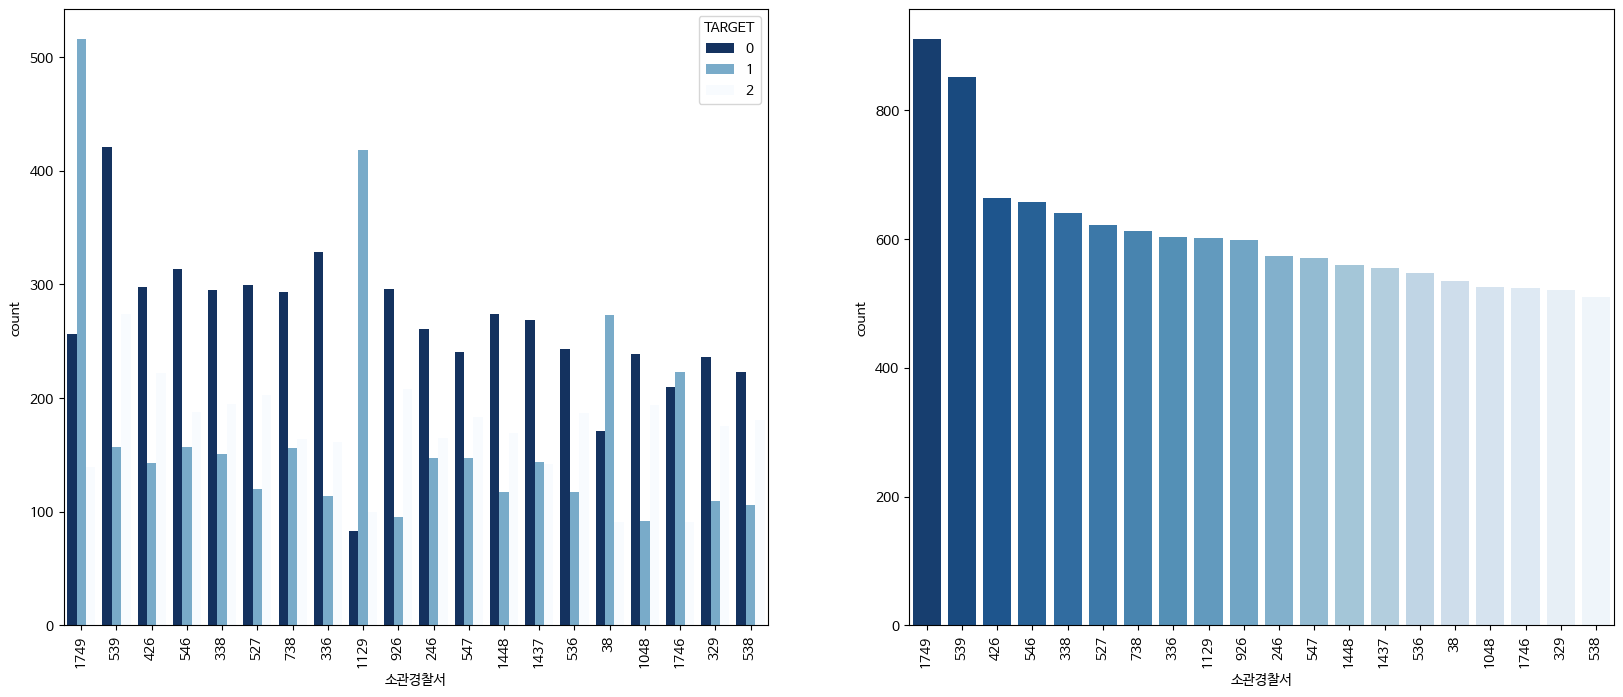

In [21]:
plt.figure(figsize = (20, 8))

plt.subplot(121)
sns.countplot(x = '소관경찰서', data = train, order = train['소관경찰서'].value_counts().index[:20], hue = 'TARGET', palette = 'Blues_r')
plt.xticks(rotation = 90)

plt.subplot(122)
sns.countplot(x = '소관경찰서', data = train, order = train['소관경찰서'].value_counts().index[:20], palette = 'Blues_r')
plt.xticks(rotation = 90)

plt.show()

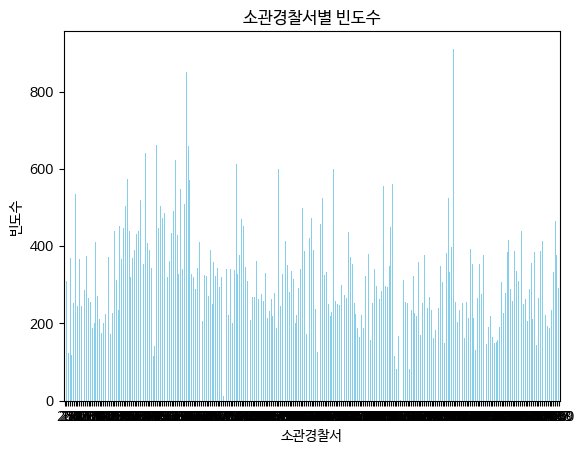

In [22]:
# '월' 열을 기준으로 빈도수 계산
monthly_counts = train['소관경찰서'].value_counts().sort_index()

# 시각화

monthly_counts.plot(kind='bar', color='skyblue')
plt.title('소관경찰서별 빈도수')
plt.xlabel('소관경찰서')
plt.ylabel('빈도수')
plt.xticks(rotation=0)
plt.show()


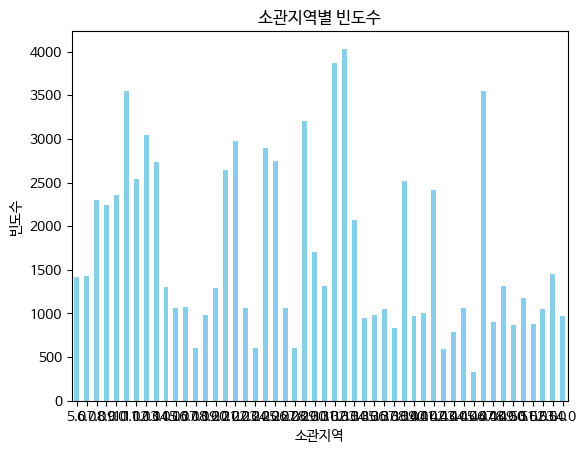

In [23]:
# '월' 열을 기준으로 빈도수 계산
monthly_counts = train['소관지역'].value_counts().sort_index()

# 시각화

monthly_counts.plot(kind='bar', color='skyblue')
plt.title('소관지역별 빈도수')
plt.xlabel('소관지역')
plt.ylabel('빈도수')
plt.xticks(rotation=0)
plt.show()


#기후

In [24]:
# '풍향'부터 '눈날림'까지의 특성 선택
weather_features = train.iloc[:, 11:18]

# 각 변수별로 1의 개수 계산
ones_count = weather_features.sum()

# 1의 개수를 내림차순으로 정렬
sorted_ones_count = ones_count.sort_values(ascending=False)

# 결과 출력
print(sorted_ones_count)


안개       32532.0
연기/연무    17789.0
번개       12158.0
진눈깨비      1716.0
짙은안개      1506.0
서리         866.0
눈날림        753.0
dtype: float64


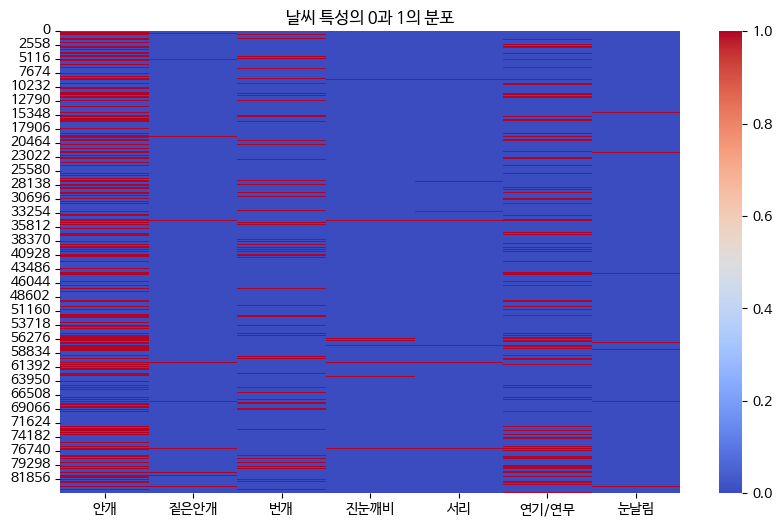

In [25]:
# '풍향'부터 '눈날림'까지의 특성을 선택
weather_features = train.iloc[:, 11:18]

# 히트맵 생성
plt.figure(figsize=(10, 6))
sns.heatmap(weather_features, cmap="coolwarm", cbar=True, xticklabels=1)

plt.title('날씨 특성의 0과 1의 분포')
plt.show()


* 기후 발생은 안개>연기/연무>번개>진눈깨비>짙은안개>서리>눈날림 순으로 나타난다.

In [26]:
#안개열
fog_column = 11

# '안개' 열에서 target이 0인 경우의 개수 계산
count_fog_target_0 = train[train.iloc[:, fog_column] == 1]['TARGET'].value_counts().get(0, 0)
count_fog_target_1 = train[train.iloc[:, fog_column] == 1]['TARGET'].value_counts().get(1, 0)
count_fog_target_2 = train[train.iloc[:, fog_column] == 1]['TARGET'].value_counts().get(2, 0)

# 결과 출력
print(f'안개가 target 0인 경우에 {count_fog_target_0}번 count되었습니다.')
print(f'안개가 target 1인 경우에 {count_fog_target_1}번 count되었습니다.')
print(f'안개가 target 2인 경우에 {count_fog_target_2}번 count되었습니다.')

안개가 target 0인 경우에 14152번 count되었습니다.
안개가 target 1인 경우에 9775번 count되었습니다.
안개가 target 2인 경우에 8605번 count되었습니다.


In [27]:
# '안개' 열의 시작 인덱스와 종료 인덱스
start_column = 11
end_column = 17
for fog_column in range(start_column, end_column + 1):
        count_fog_target_0 = train[train.iloc[:, fog_column] == 1]['TARGET'].value_counts().get(0, 0)
        count_fog_target_1 = train[train.iloc[:, fog_column] == 1]['TARGET'].value_counts().get(1, 0)
        count_fog_target_2 = train[train.iloc[:, fog_column] == 1]['TARGET'].value_counts().get(2, 0)
        ratio_fog_target_0 = train[train.iloc[:, fog_column] == 1]['TARGET'].value_counts(normalize=True).get(0, 0)
        ratio_fog_target_1 = train[train.iloc[:, fog_column] == 1]['TARGET'].value_counts(normalize=True).get(1, 0)
        ratio_fog_target_2 = train[train.iloc[:, fog_column] == 1]['TARGET'].value_counts(normalize=True).get(2, 0)
        # 결과 출력
        print(f"{train.columns[fog_column]} 열에서 target 0(강도)인 경우에 {count_fog_target_0}번 count되었으며 {ratio_fog_target_0:.2%}.비율이 나타남..")
        print(f"{train.columns[fog_column]} 열에서 target 1(절도)인 경우에 {count_fog_target_1}번 count되었으며 {ratio_fog_target_1:.2%}.비율이 나타남.")
        print(f"{train.columns[fog_column]} 열에서 target 2(상해)인 경우에 {count_fog_target_2}번 count되었으며 {ratio_fog_target_2:.2%}.비율이 나타남.")
        print()

안개 열에서 target 0(강도)인 경우에 14152번 count되었으며 43.50%.비율이 나타남..
안개 열에서 target 1(절도)인 경우에 9775번 count되었으며 30.05%.비율이 나타남.
안개 열에서 target 2(상해)인 경우에 8605번 count되었으며 26.45%.비율이 나타남.

짙은안개 열에서 target 0(강도)인 경우에 636번 count되었으며 42.23%.비율이 나타남..
짙은안개 열에서 target 1(절도)인 경우에 452번 count되었으며 30.01%.비율이 나타남.
짙은안개 열에서 target 2(상해)인 경우에 418번 count되었으며 27.76%.비율이 나타남.

번개 열에서 target 0(강도)인 경우에 5318번 count되었으며 43.74%.비율이 나타남..
번개 열에서 target 1(절도)인 경우에 3688번 count되었으며 30.33%.비율이 나타남.
번개 열에서 target 2(상해)인 경우에 3152번 count되었으며 25.93%.비율이 나타남.

진눈깨비 열에서 target 0(강도)인 경우에 719번 count되었으며 41.90%.비율이 나타남..
진눈깨비 열에서 target 1(절도)인 경우에 476번 count되었으며 27.74%.비율이 나타남.
진눈깨비 열에서 target 2(상해)인 경우에 521번 count되었으며 30.36%.비율이 나타남.

서리 열에서 target 0(강도)인 경우에 367번 count되었으며 42.38%.비율이 나타남..
서리 열에서 target 1(절도)인 경우에 220번 count되었으며 25.40%.비율이 나타남.
서리 열에서 target 2(상해)인 경우에 279번 count되었으며 32.22%.비율이 나타남.

연기/연무 열에서 target 0(강도)인 경우에 7672번 count되었으며 43.13%.비율이 나타남..
연기/연무 열에서 target 1(절도)인 경우에 5335번 count되었으며 29.99%.비율이 나타남.
연기/연무 열에서 

* 안개, 짙은안개, 번개, 강도, 가 있는 날 강도 범죄 발생 빈도가 높게 나타남.


#범죄발생지

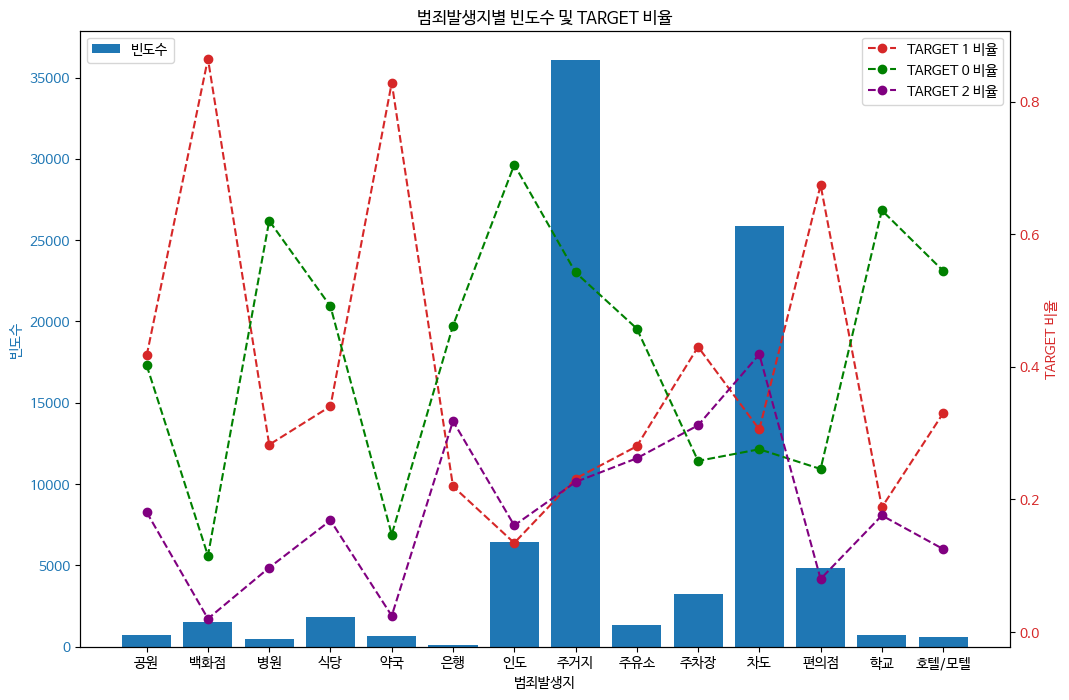

In [28]:
# '월' 열을 기준으로 빈도수 계산
monthly_counts = train['범죄발생지'].value_counts().sort_index()

# '월' 별 'TARGET' 값의 비율 계산
target_counts_by_month = train.groupby('범죄발생지')['TARGET'].value_counts(normalize=True).unstack(fill_value=0)

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 8))

# 빈도수를 막대 그래프로 표시
color = 'tab:blue'
ax1.set_xlabel('범죄발생지')
ax1.set_ylabel('빈도수', color=color)
ax1.bar(monthly_counts.index, monthly_counts.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 'TARGET' 값의 비율을 선 그래프로 표시
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('TARGET 비율', color=color)
ax2.plot(target_counts_by_month.index, target_counts_by_month[1], label='TARGET 1 비율', color=color, linestyle='dashed', marker='o')
ax2.plot(target_counts_by_month.index, target_counts_by_month[0], label='TARGET 0 비율', color='green', linestyle='dashed', marker='o')
ax2.plot(target_counts_by_month.index, target_counts_by_month[2], label='TARGET 2 비율', color='purple', linestyle='dashed', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# 범례 위치를 조절하여 옆에 표시
ax1.legend(['빈도수'], loc='upper left')
ax2.legend(loc='upper right')

plt.title('범죄발생지별 빈도수 및 TARGET 비율')
plt.show()

* 주거지  차도 > 인도> 편의점> 주차장 순으로 범죄발생
* 백화점,약국,주차장,편의점에서는 TARGET1 범죄 발생 빈도가 더 크다.
* 병원,식당, 은행, 인도, 주거지, 주유소, 학교, 호텔.모텔에서는 TARGET0 범죄 발생 빈도가 더 크다.
* 유일하게 차도에서 TARGET2의 범죄 빈도가 더 큰것을 알 수 있다.
* 차도에서는 교통사고로 인해 TARGET2 (상해)의 범죄 빈도가 더 큰것으로 유추 가능하다.

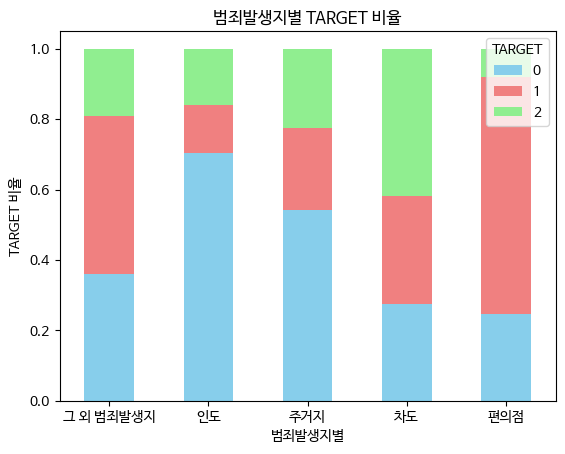

In [29]:
# '범죄발생지'를 기준으로 그룹 나누기
train['그룹'] = train['범죄발생지'].apply(lambda x: '차도' if x == '차도' else '주거지' if x == '주거지' else '인도' if x == '인도' else '편의점' if x == '편의점' else '그 외 범죄발생지')

# '요일_묶음' 별 'TARGET' 값의 비율 계산
target_ratio_by_weekday = train.groupby('그룹')['TARGET'].value_counts(normalize=True).unstack(fill_value=0)

# 시각화
target_ratio_by_weekday.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('범죄발생지별 TARGET 비율')
plt.xlabel('범죄발생지별')
plt.ylabel('TARGET 비율')
plt.xticks(rotation=0)
plt.legend(title='TARGET', loc='upper right')
plt.show()


* 범죄발생빈도가 높은 주거지,차도,인도,편의점만 분리해서 범죄발생지별 TARGET데이터 비중 확인
* 그 외 범죄발생지 대비 인도와 주거지에서 TARGET0이 높은 비중으로 범죄 발생
* 그 외 밤죄발생지 대비 차도에서는 TARGET2의 비중이 높게 발생
* 편의점은 TARGET1가 그 외 범죄발생지 대비 높게 발생하며
* 범죄발생지에 따라 발생되는 범죄의 유형이 다를것으로 예상

# 상관관계 확인
- feature간의 상관관계를 확인함으로써 종속변수와 연관된 변수, 다중공선성이 일어날 변수 등을 확인할 수 있습니다.
- 머신러닝에서 피처들 간에 상관관계가 높아서 발생하는 문제를 다중공선성이라 합니다.
- 다중공선성이 존재하는 변수들을 제거하지 않을 경우 모델의 예측 성능이 저하될 수 있습니다.

In [30]:
train = train.drop(['ID','요일','범죄발생지'], axis = 1)
print(train.corr(method='pearson'))

                월        시간     소관경찰서      소관지역    사건발생거리   강수량(mm)   강설량(mm)  \
월        1.000000  0.001021  0.022140  0.024666  0.003307  0.071198 -0.223278   
시간       0.001021  1.000000 -0.007860 -0.004828  0.001420  0.002527 -0.000071   
소관경찰서    0.022140 -0.007860  1.000000  0.675550 -0.115580 -0.000292  0.003288   
소관지역     0.024666 -0.004828  0.675550  1.000000 -0.099904  0.002799 -0.001197   
사건발생거리   0.003307  0.001420 -0.115580 -0.099904  1.000000  0.005984  0.000539   
강수량(mm)  0.071198  0.002527 -0.000292  0.002799  0.005984  1.000000  0.138052   
강설량(mm) -0.223278 -0.000071  0.003288 -0.001197  0.000539  0.138052  1.000000   
적설량(cm) -0.403476 -0.001652 -0.003845 -0.010653  0.002232 -0.006283  0.495190   
풍향      -0.048975  0.001782 -0.000514 -0.000090 -0.000206 -0.026439  0.074520   
안개      -0.101427 -0.003908 -0.004928 -0.006657 -0.000882  0.315461  0.136065   
짙은안개    -0.180760 -0.002607  0.000046 -0.003903 -0.004794 -0.034980  0.025198   
번개       0.170173  0.000684 

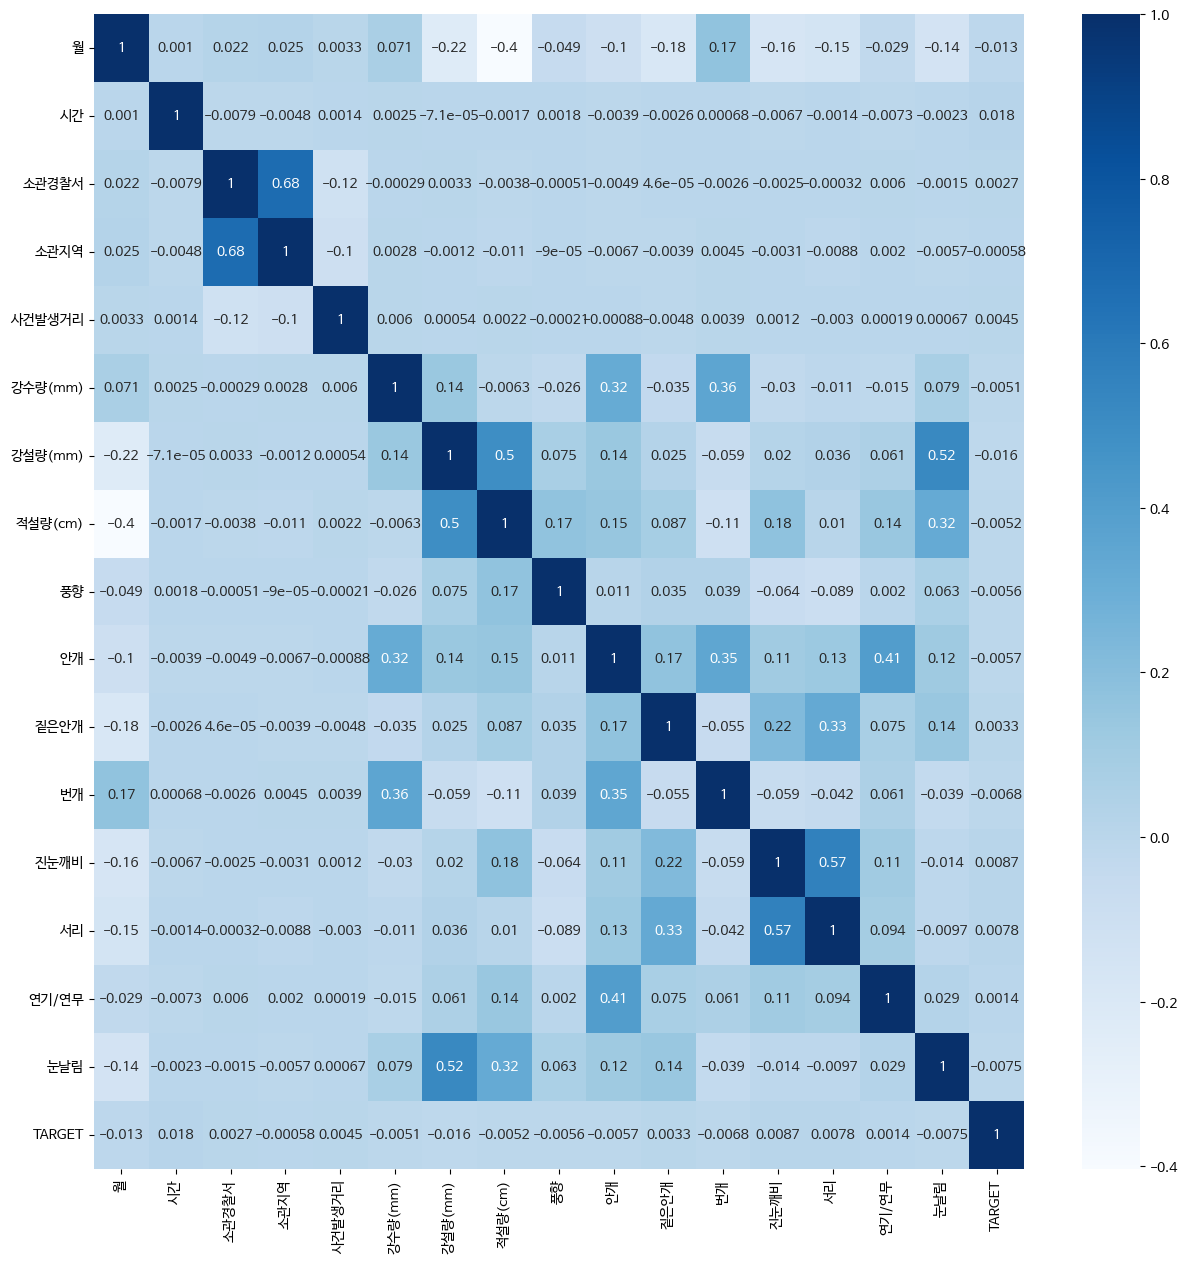

In [31]:
plt.figure(figsize = (15,15), dpi = 100)
sns.heatmap(train.corr(), annot = True, cmap = 'Blues')
plt.show()